# Netflix Data EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
flix = pd.read_csv('./Downloads/Netflix2019.csv')

In [5]:
flix.tail(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie
5835,70157452,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show
5836,70053412,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,NR,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",Movie


In [8]:
flix.shape

(5837, 12)

In [13]:
flix.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

# Problem Statement

1. Direocor, Cast, Country, Date Added and Rating is Null values.

2. 

In [103]:
pd.DataFrame(flix.groupby(['release_year'])['date_added'].value_counts()).T

release_year              1925           1942           1943           1944  \
date_added   December 30, 2018 March 31, 2017 March 31, 2017 March 31, 2017   
date_added                   1              2              3              3   

release_year           1945             1946                               \
date_added   March 31, 2017 February 1, 2017 July 19, 2018 March 31, 2017   
date_added                3                1             1              1   

release_year           1947          1954  ...            2019  \
date_added   March 31, 2017 July 15, 2012  ... October 3, 2019   
date_added                1             1  ...               1   

release_year                                                           \
date_added   September 18, 2019 September 19, 2019 September 21, 2019   
date_added                    1                  1                  1   

release_year                                                           \
date_added   September 22, 2019 September 26, 2019 September 30, 2019   
date_added                    1                  1                  1   

release_year                                                  2020  
date_added   September 5, 2019 September 9, 2019 November 13, 2019  
date_added                   1                 1                 1  

[1 rows x 2766 columns]

In [32]:
flix.type.value_counts()

Movie      3939
TV Show    1898
Name: type, dtype: int64

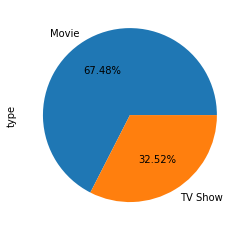

In [37]:
flix.type.value_counts().plot(kind = 'pie',autopct='%1.2f%%')

In [38]:
# 67.48 % of movies in the NF
# 32.52 % of TV Shows on NF

In [45]:
#plt.plot('type','release_year', data=flix)

In [55]:
flix.release_year.describe()

count    5837.000000
mean     2013.688539
std         8.419088
min      1925.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: release_year, dtype: float64

In [100]:
pd.DataFrame(flix.groupby('release_year')['type'].value_counts().sort_values(ascending=False).nlargest(5))

,,type
release_year,type,
2017,Movie,655
2018,Movie,630
2016,Movie,584
2019,TV Show,415
2018,TV Show,410


In [95]:
pd.DataFrame(flix.groupby('release_year')['type'].value_counts().nlargest(5))

,,type
release_year,type,
2017,Movie,655
2018,Movie,630
2016,Movie,584
2019,TV Show,415
2018,TV Show,410


<Figure size 1296x1296 with 0 Axes>

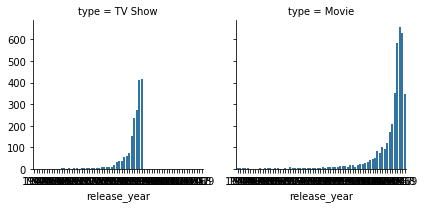

In [106]:
plt.figure(figsize=[18,18])
g = sns.FacetGrid(flix,col='type')
g.map(sns.countplot,'release_year')
plt.show()

In [8]:
# Summary : missing value cinque values and datatype



def summary (df):
    local = pd.DataFrame()
    local["Missing Values"] = df.isnull().sum()
    local['Unique']= df.nunique()
    local['Data Type'] = df.dtypes
    return (local)

In [9]:
summary(flix)

,Missing Values,Unique,Data Type
show_id,0,5837,int64
title,0,5780,object
director,1901,3108,object
cast,556,5087,object
country,427,527,object
date_added,642,1092,object
release_year,0,71,int64
rating,10,14,object
duration,0,194,object
listed_in,0,449,object


In [16]:
# Year = Date added

flix['Month'] = pd.to_datetime(flix.date_added).dt.month
flix['Year'] = pd.to_datetime(flix.date_added).dt.year

In [18]:
flix.head(1)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Month,Year
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,11.0,2019.0


In [19]:
# Release year in the missing values

df = flix[flix.Year.isnull()]